In [1]:
import pandas as pd
df = pd.read_csv("Dhaka Rent.csv", sep=';')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


# Do experiment!

In [3]:
df.info()
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


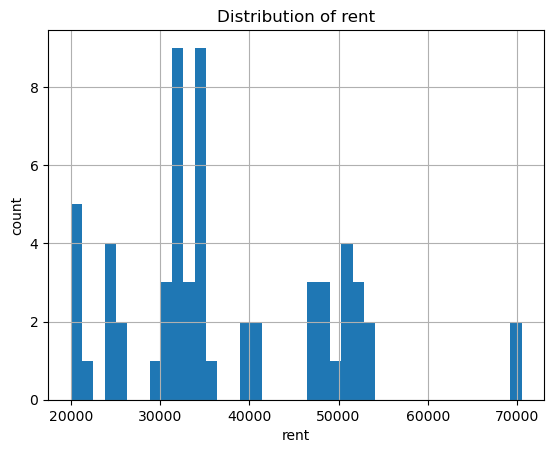

In [4]:
target = 'rent' 
import matplotlib.pyplot as plt


# histogram of target
df[target].hist(bins=40)
plt.title(f'Distribution of {target}')
plt.xlabel(target)
plt.ylabel('count');

In [7]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols.remove(target) if target in num_cols else None
# numeric correlations
corr = df[num_cols + [target]].corr()[target].sort_values(ascending=False)
print(corr)


rent    1.000000
area    0.974807
Name: rent, dtype: float64


Text(0, 0.5, 'rent')

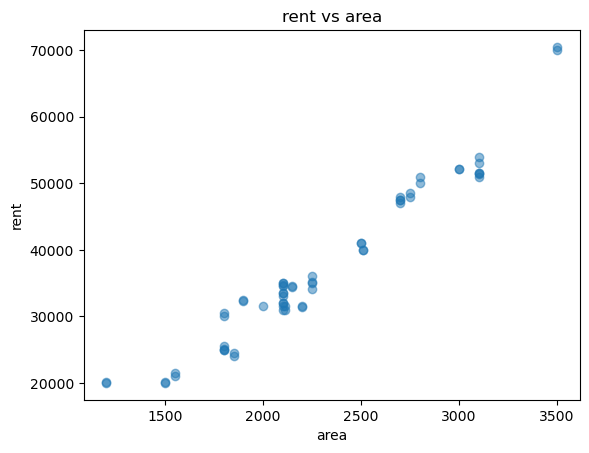

In [14]:
plt.scatter(df['area'], df['rent'], alpha=0.5)
plt.title('rent vs area')
plt.xlabel('area')
plt.ylabel('rent')
    

In [19]:
x=df.drop('rent', axis=1)

In [20]:
x.head()


,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [23]:
y=df[['rent']]
y.head()

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
reg=LinearRegression()

In [26]:
x.mean()

area    2289.0
dtype: float64

In [27]:
y.mean()

rent    37269.166667
dtype: float64

Text(0, 0.5, 'rent')

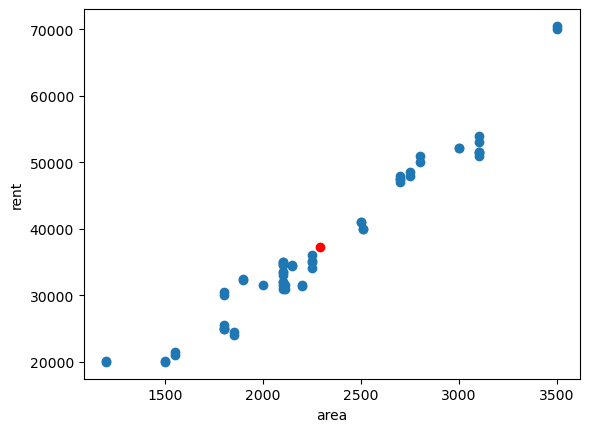

In [31]:
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(x,y)
plt.xlabel('area')
plt.ylabel('rent')
    

In [32]:
reg.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
m=reg.coef_


array([[21.29266147]])

In [34]:
c=reg.intercept_

array([-11469.73544643])

In [35]:
reg.predict([[1820]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[27282.90843554]])

In [36]:
df['predicted_y']=reg.predict(x)

In [37]:
df.head()

,area,rent,predicted_y
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


Text(0, 0.5, 'rent')

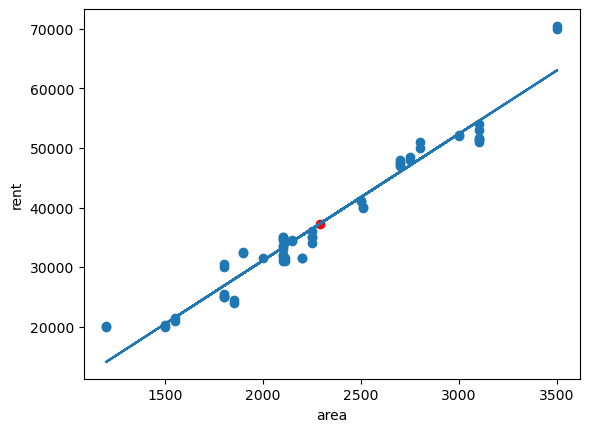

In [41]:
plt.plot(x,df['predicted_y'])
plt.scatter(x.mean(),y.mean(),color='red')
plt.scatter(x,y)
plt.xlabel('area')
plt.ylabel('rent')